## Linear Regression Model

- It is the linear approach for modelling the relationship between one or more dependent and independent variables(features).
- It has applications that falls into one of the following two broad categories.
    1. If the goal is `prediction`, `forecasting` or `error-detection`.
    2. If the goal is to `analyse` or to explain `relationship/variation` between dependent and independent feattures. 
- <br><img src="s1.png" width=150px height=150px align="left"><br><br><br><br><br><br><br><br><br><br><br> 
- In linear regression, the observations (`red`) are assumed to be the result of random deviations (`green`) from an underlying relationship (`blue`) between a `dependent` variable (`y`) and an `independent` variable (`x`).
- In other words, `red` are the actual value while its reflection marked in`green`on blue line is the predicted value.
- Thus, `e` i.e error variable is added in the equation.

### Equation
<br>
<img src="s2.png" width=500px height=500px align="left">

- `y` is the `dependent` variable.
- `yhat` is the `predicted` value.
- `X` is the `n-dimensional Column Vector` known as `input` variable or `independent` variable.
- `B` is the intercept.
- Note: Xi0 = b0 = 1

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Data Set Information:

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. The â€œreal estate valuationâ€ is a regression problem. The data set was randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples).

### Attribute Information:

- The inputs are as follows
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

- The output is as follow
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [2]:
df = pd.read_excel('../Dataset/Real estate valuation data set.xlsx')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df = df.drop(['No'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [6]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
# Transaction data - 2003.0 -> Jan, 2003.250-> March etc.
# So, 2 new feature -> transaction year and transaction month can be created.
transaction_year = np.ones((414,1))
transaction_month = np.ones((414,1))
for i in range(414):
    transaction_year[i] = int(df['X1 transaction date'][i])
    if 0 < (df['X1 transaction date'][i] - transaction_year[i])*1000 < round(83.33):
        transaction_month[i] = 1 #January
    elif 83.33 < (df['X1 transaction date'][i] - transaction_year[i])*1000 <= round(166.66):
        transaction_month[i] = 2 #February
    elif 166.66 < (df['X1 transaction date'][i] - transaction_year[i])*1000 <= round(249.99):
        transaction_month[i] = 3 #March
    elif 249.99 < (df['X1 transaction date'][i] - transaction_year[i])*1000 <= round(333.32):
        transaction_month[i] = 4 #April
    elif 333.32 < (df['X1 transaction date'][i] - transaction_year[i])*1000 <= round(416.65):
        transaction_month[i] = 5 #May
    elif 416.65 < (df['X1 transaction date'][i] - transaction_year[i])*1000 <= round(499.98):
        transaction_month[i] = 6 #June
    elif 499.98 < (df['X1 transaction date'][i] - transaction_year[i])*1000 <= round(583.31):
        transaction_month[i] = 7 #July
    elif 583.31 < (df['X1 transaction date'][i] - transaction_year[i])*1000 <= round(666.64):
        transaction_month[i] = 8 #August
    elif 666.64 < (df['X1 transaction date'][i] - transaction_year[i])*1000 <= round(749.97):
        transaction_month[i] = 9 #September
    elif 749.97 < (df['X1 transaction date'][i] - transaction_year[i])*1000 <= round(833.3):
        transaction_month[i] = 10 #October
    elif 833.3 < (df['X1 transaction date'][i] - transaction_year[i])*1000 <= round(916.63):
        transaction_month[i] = 11 #November
    else:
        transaction_month[i] = 12 #December

In [8]:
df['transaction_year'] = transaction_year
df['transaction_month'] = transaction_month

In [9]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,transaction_year,transaction_month
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,2012.0,11.0
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,2012.0,11.0
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,2013.0,8.0
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2013.0,6.0
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,2012.0,11.0
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4,2013.0,12.0
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0,2012.0,8.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6,2013.0,3.0
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5,2013.0,12.0


In [10]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,transaction_year,transaction_month
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,2012.0,11.0
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,2012.0,11.0
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,2013.0,8.0
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2013.0,6.0
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,2012.0,11.0


## Data Visualization

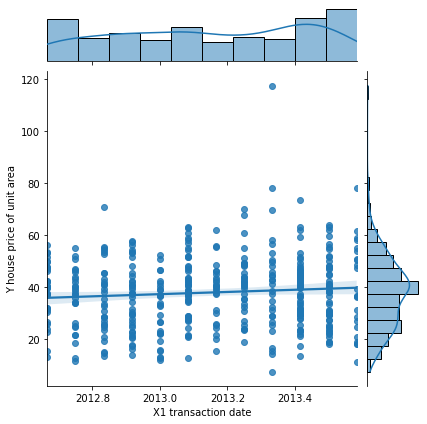

In [11]:
sns.jointplot(x=df['X1 transaction date'], y=df['Y house price of unit area'], data=df, kind='reg')

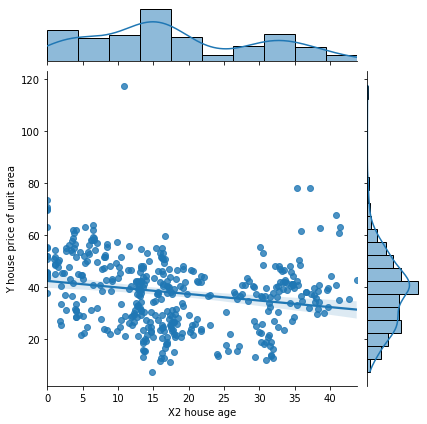

In [12]:
sns.jointplot(x=df['X2 house age'], y=df['Y house price of unit area'], data=df, kind='reg')

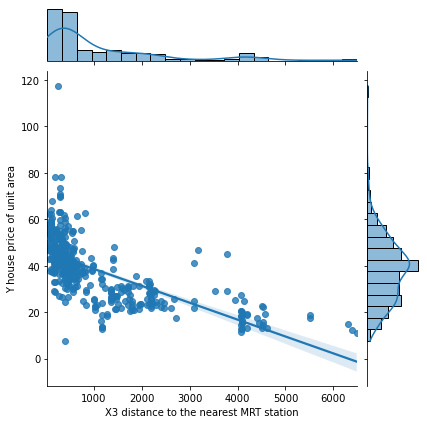

In [13]:
sns.jointplot(x=df['X3 distance to the nearest MRT station'], y=df['Y house price of unit area'], data=df, kind='reg')

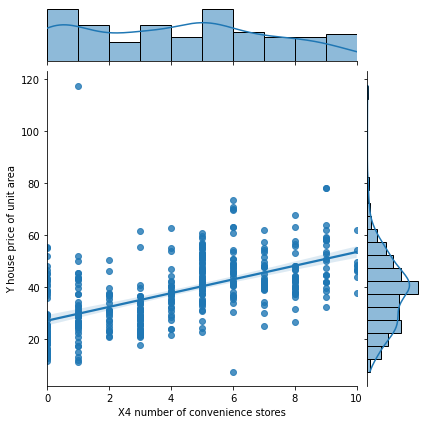

In [14]:
sns.jointplot(x=df['X4 number of convenience stores'], y=df['Y house price of unit area'], data=df, kind='reg')

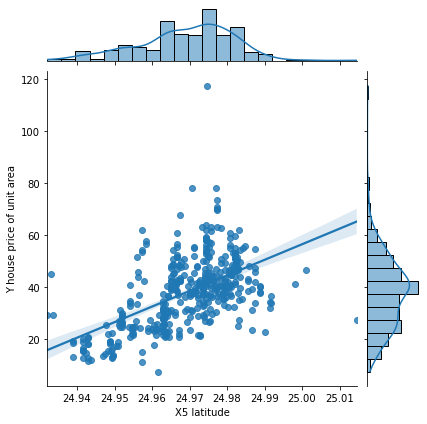

In [15]:
sns.jointplot(x=df['X5 latitude'], y=df['Y house price of unit area'], data=df, kind='reg')

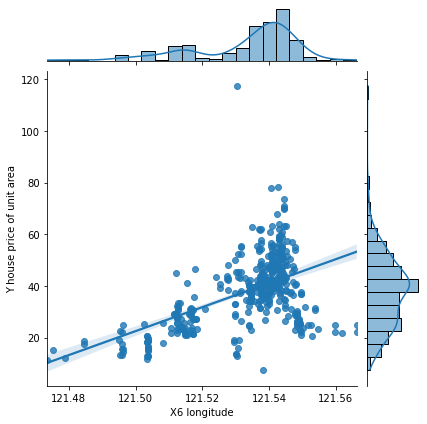

In [16]:
sns.jointplot(x=df['X6 longitude'], y=df['Y house price of unit area'], data=df, kind='reg')

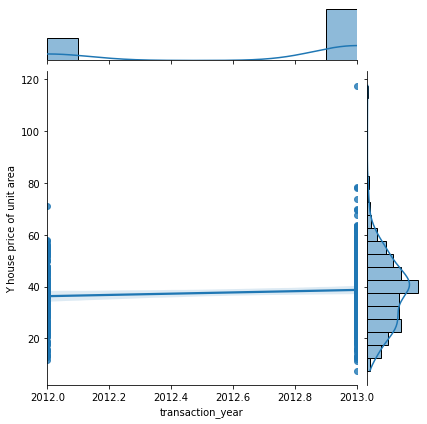

In [17]:
sns.jointplot(x=df['transaction_year'], y=df['Y house price of unit area'], data=df, kind='reg')

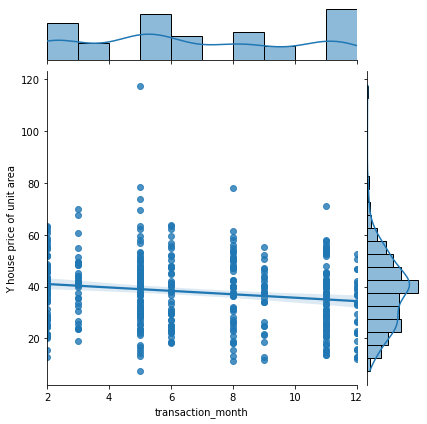

In [18]:
sns.jointplot(x=df['transaction_month'], y=df['Y house price of unit area'], data=df, kind='reg')

In [19]:
X = df['X3 distance to the nearest MRT station']
Y = df['Y house price of unit area']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (331, 1)
Test - Predictors shape (83, 1)
Train - Target shape (331, 1)
Test - Target shape (83, 1)


In [21]:
# calculate co-efficient
def theta_calc(x_train, y_train): 
    #Initializing all variables
    n_data = x_train.shape[0]
    
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)

    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)

    return theta

In [22]:
def predict_func(slope,intercept,x_test):
    
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):
        pred.append((slope * x_test[i] + intercept))
             
    return pred

In [23]:
def mse_calc(prediction, y_test):
    
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [24]:
def rsq(prediction, y_test):

    total_data = len(prediction)
    
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    r2 = 1 - (res_err / tot_err)
    return r2

In [25]:
#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', slope)

Intercept of the model [46.24269005]
Slope of the model [-0.00740951]


In [26]:
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)

In [27]:
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

R squared value 0.5389597665019769


In [28]:
#MSE calculation
pred_df = pd.DataFrame(prediction)
pred_df.columns=['Y house price of unit area']
error =  mse_calc(prediction, y_test)
print('Mean squared error of the model', error)

Mean squared error of the model 77.34399178518463


In [29]:
error = (np.sum((prediction - y_test)**2))/len(prediction)
error

77.34399178518463

Text(0, 0.5, 'Residual')

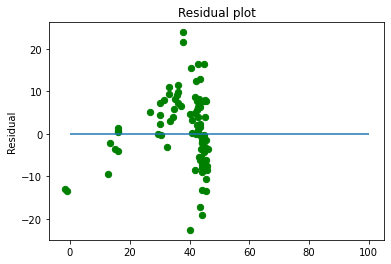

In [30]:
#Residual plot
plt.scatter(prediction, prediction - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

In [31]:
pred_df.head()

,Y house price of unit area
0,44.808323
1,42.595496
2,44.212377
3,44.982118
4,30.051956


In [32]:
y_test[1:6]

array([[42.3],
       [52.2],
       [37.3],
       [22.8],
       [36.3]])

### Using Scikit-Learn

In [33]:
cls = LinearRegression()
cls.fit(x_train,y_train)

LinearRegression()

In [34]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[-0.00740951]]


In [35]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [46.24269005]


In [36]:
print('Mean Square Error', mean_squared_error(y_test, prediction))

Mean Square Error 77.34399178518463


In [37]:
print('Model R^2 Square value', r2_score(y_test, prediction))

Model R^2 Square value 0.5389597665019769


Text(0.5, 1.0, 'Linear Regression')

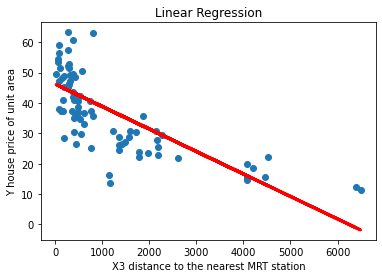

In [38]:
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

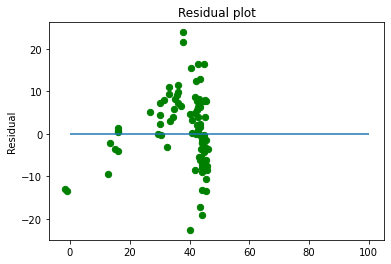

In [39]:
#Residual plot
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')